In [ ]:
#!/usr/bin/env python
# encoding: utf-8
"""
LJ_fetch.py

Created by Maksim Tsvetovat on 2011-04-28.
Copyright (c) 2011 __MyCompanyName__. All rights reserved.
"""

import sys
import os
import networkx as net
import urllib


def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    response=urllib.urlopen('http://www.livejournal.com/misc/fdata.bml?user='+name)
    for line in response.readlines():
        #Comments in the response start with a '#'
        if line.startswith('#'): continue 
        
        # the format is "< name" (incoming) or "> name" (outgoing)
        parts=line.split()
        
        #make sure that we don't have an empty line
        if len(parts)==0: continue
        
        #add the edge to the network
        if parts[0]=='<': 
            g.add_edge(parts[1],name)
        else:
            g.add_edge(name,parts[1])

def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    # if we have reached the depth limit of the search, bomb out.
    print center, current_depth, max_depth, taboo_list
    if current_depth==max_depth: 
        print 'out of depth'
        return taboo_list
    if center in taboo_list:
        print 'taboo' 
        return taboo_list #we've been here before
    else:
        taboo_list.append(center) # we shall never return
        
    read_lj_friends(g, center)
    
    for node in g.neighbors(center):
        taboo_list=snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
    
    return taboo_list
    
    







def main():
    g=net.Graph()
#    read_lj_friends(g,'kozel_na_sakse')
    snowball_sampling(g,'kozel_na_sakse')
    

if __name__ == '__main__':
    main()



In [5]:
import networkx as net
import urllib
import matplotlib.pyplot as plt

In [6]:
g=net.Graph()

In [7]:
g.add_edge('a','b')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

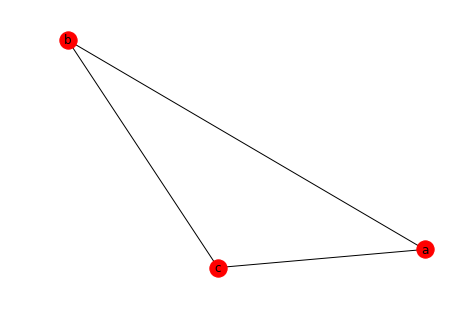

In [12]:
g.add_edge('b','c')
g.add_edge('c','a')
net.draw(g,with_labels=True)
plt.show()

In [13]:
g['a']['b']['weight']=1
g['a']['b']['weight']

1

In [75]:
def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    response=urllib.request.urlopen('http://www.livejournal.com/misc/fdata.bml?user='+name)
    for line in response.readlines():
        line = str.replace(str(line),'b\'','')
        line = str.replace(line,'\\n\'','')
        #Comments in the response start with a '#'
        if line.startswith('#'): continue 
        
        # the format is "< name" (incoming) or "> name" (outgoing)
        parts=line.split()
        
        #make sure that we don't have an empty line
        if len(parts)==0: continue
        
        #add the edge to the network
        if parts[0]=='<': 
            #print(parts[1])
            g.add_edge(parts[1],name)
        elif parts[0]=='>':
            #print(parts[1])
            g.add_edge(name,parts[1])
        else:
            continue

In [76]:
g=net.Graph()
read_lj_friends(g,'valerois')
len(g) #count the number of nodes returned

302

In [80]:
len(net.nodes(g))

302

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

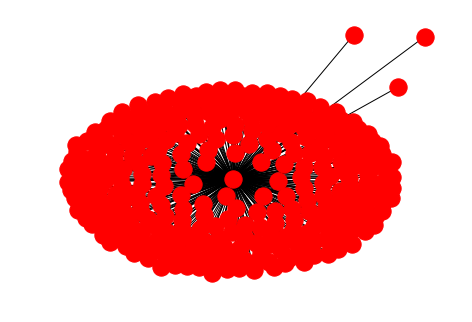

In [77]:
net.draw(g)
plt.show()

In [51]:
response=urllib.request.urlopen('http://www.livejournal.com/misc/fdata.bml?user=valerois')
for line in response.readlines():
    #print(type(line))
    line = str.replace(str(line),'b\'','')
    print(line)
    print(line.split())
    #if line.startswith('b\'#'): 
    #    print(line)

# Note: Polite data miners cache on their end.  Impolite ones get banned.\n'
['#', 'Note:', 'Polite', 'data', 'miners', 'cache', 'on', 'their', 'end.', 'Impolite', 'ones', 'get', "banned.\\n'"]
> bagira\n'
['>', "bagira\\n'"]
> angerona\n'
['>', "angerona\\n'"]
> yankel\n'
['>', "yankel\\n'"]
> yelya\n'
['>', "yelya\\n'"]
> ponka\n'
['>', "ponka\\n'"]
> marinka\n'
['>', "marinka\\n'"]
> saper\n'
['>', "saper\\n'"]
> levinius\n'
['>', "levinius\\n'"]
> monella\n'
['>', "monella\\n'"]
> irbisa\n'
['>', "irbisa\\n'"]
> innaplanetyanka\n'
['>', "innaplanetyanka\\n'"]
> hutshepsut\n'
['>', "hutshepsut\\n'"]
> skyg74\n'
['>', "skyg74\\n'"]
> samoleg\n'
['>', "samoleg\\n'"]
> actr\n'
['>', "actr\\n'"]
> gottfrid\n'
['>', "gottfrid\\n'"]
> krimsky\n'
['>', "krimsky\\n'"]
> nelis\n'
['>', "nelis\\n'"]
> ptfenix\n'
['>', "ptfenix\\n'"]
> leprechaun\n'
['>', "leprechaun\\n'"]
> a_u\n'
['>', "a_u\\n'"]
> e_f\n'
['>', "e_f\\n'"]
> boctok\n'
['>', "boctok\\n'"]
> karial\n'
['>', "karial\\n'"]
> watt

< camoe\n'
['<', "camoe\\n'"]
< sergey_gora\n'
['<', "sergey_gora\\n'"]
< hamptonlanny\n'
['<', "hamptonlanny\\n'"]
< lara_x\n'
['<', "lara_x\\n'"]
< nikolay_suslov\n'
['<', "nikolay_suslov\\n'"]
< donna_marta\n'
['<', "donna_marta\\n'"]
< beauty_co\n'
['<', "beauty_co\\n'"]
< alexmonc\n'
['<', "alexmonc\\n'"]
< leo_taxil\n'
['<', "leo_taxil\\n'"]
< altruisttka\n'
['<', "altruisttka\\n'"]
< untitande\n'
['<', "untitande\\n'"]
< marynog\n'
['<', "marynog\\n'"]
< valmsn\n'
['<', "valmsn\\n'"]
< goodspider\n'
['<', "goodspider\\n'"]
< sosedgeorg\n'
['<', "sosedgeorg\\n'"]
< pavel_ist\n'
['<', "pavel_ist\\n'"]
< glebminskiy\n'
['<', "glebminskiy\\n'"]
< maximkamax\n'
['<', "maximkamax\\n'"]
< s_to4ki_zrenia\n'
['<', "s_to4ki_zrenia\\n'"]
\n'
["\\n'"]


In [83]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    # if we have reached the depth limit of the search, bomb out.
    print(center, current_depth, max_depth, taboo_list)
    if current_depth==max_depth: 
        print('out of depth')
        return taboo_list
    if center in taboo_list:
        print('taboo')
        return taboo_list #we've been here before
    else:
        taboo_list.append(center) # we shall never return
        
    read_lj_friends(g, center)
    
    for node in g.neighbors(center):
        taboo_list=snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
    
    return taboo_list

In [84]:
g=net.Graph()
snowball_sampling(g,'kozel_na_sakse')

kozel_na_sakse 0 1 []
cr 1 1 ['kozel_na_sakse']
out of depth
saper 1 1 ['kozel_na_sakse']
out of depth
ptfenix 1 1 ['kozel_na_sakse']
out of depth
guy_gomel 1 1 ['kozel_na_sakse']
out of depth
klari 1 1 ['kozel_na_sakse']
out of depth
dachte 1 1 ['kozel_na_sakse']
out of depth
solo_oboroten 1 1 ['kozel_na_sakse']
out of depth
zina_korzina 1 1 ['kozel_na_sakse']
out of depth
kirulya 1 1 ['kozel_na_sakse']
out of depth
letchikleha 1 1 ['kozel_na_sakse']
out of depth
usolt 1 1 ['kozel_na_sakse']
out of depth
jolita 1 1 ['kozel_na_sakse']
out of depth
periskop 1 1 ['kozel_na_sakse']
out of depth
valerois 1 1 ['kozel_na_sakse']
out of depth
cher_no_more 1 1 ['kozel_na_sakse']
out of depth
to_to_i_ono_to 1 1 ['kozel_na_sakse']
out of depth
cheese_people 1 1 ['kozel_na_sakse']
out of depth
olga_mama 1 1 ['kozel_na_sakse']
out of depth
ak_bara 1 1 ['kozel_na_sakse']
out of depth
gde_moi_mozgi 1 1 ['kozel_na_sakse']
out of depth
tanyakotova 1 1 ['kozel_na_sakse']
out of depth
sovarh 1 1 ['kozel

['kozel_na_sakse']

In [85]:
net.write_pajek(g,'lj_friends.net')

In [87]:
g=net.read_pajek('russians.net')
len(g)
deg=net.degree(g)


232

In [101]:
deg

{'maly_na': 1,
 'koradokosta': 1,
 'reinkarni': 2,
 'cartoonka': 1,
 'prihodi_smotri': 1,
 'pgrigas': 2,
 'riendespe': 1,
 'musechka': 1,
 'chijulia': 1,
 'blga': 1,
 'gogokostik': 1,
 'hieroglyph_elle': 1,
 'demettry': 1,
 'nata_f_e_ya': 4,
 'saburay': 1,
 'idealsummer': 1,
 'esta_midea': 1,
 'sarodgini': 3,
 'cedov_cergey': 1,
 'kharkov_toronto': 1,
 'money4you': 6,
 'sushka_gim': 1,
 'slayerovich': 2,
 'azzy_kikoz': 1,
 'guiness_2010': 2,
 'indeezzz': 1,
 'a_philatov': 1,
 'anfatransf': 1,
 'podarokua': 1,
 'stepnoy_lis': 1,
 'murik_555': 1,
 'osunsion': 1,
 'sakura_nu': 2,
 'broshko': 2,
 'ihavesage': 1,
 'von_tageslicht': 1,
 'gypsymelody': 1,
 'iron_marg': 1,
 'dionte_zicarel': 1,
 'lovesexandmoney': 1,
 'izmest': 1,
 'asmi_u': 1,
 'ivar59': 2,
 'poupee_russe': 1,
 'lilya_p': 1,
 'liana_23b': 1,
 'kipriena': 1,
 'azuresky2006': 2,
 '_ghost_pulse_': 1,
 'mary_tudor': 1,
 'vivisin': 5,
 'zakazfromusa': 1,
 'atom_golany': 2,
 'valja_vorobjoff': 1,
 'notolya': 1,
 'nashlykid': 1,
 'm

In [89]:
min(deg.values())

1

In [90]:
max(deg.values())

4691

In [135]:
def sorted_map(map1):
    ms = sorted(map1.items(), key=lambda k: -k[1])
    return ms

In [136]:
ds=sorted_map(deg)
ds[0:9]

[('borisakunin', 4691),
 ('doctor_liza', 3046),
 ('tareeva', 2970),
 ('cheger', 2887),
 ('karial', 2717),
 ('snorapp', 2707),
 ('masha_koroleva', 2683),
 ('elladkin', 2616),
 ('samoleg', 2597)]

In [141]:
import matplotlib.pyplot as plt

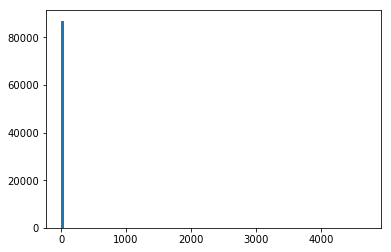

In [157]:
h=plt.hist(list(deg.values()),100)
plt.show()

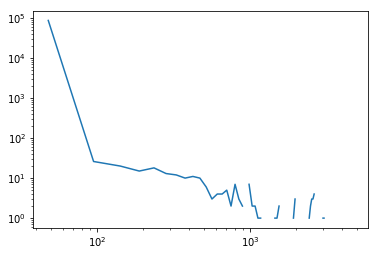

In [158]:
plt.loglog(h[1][1:],h[0])
plt.show()

In [160]:
def trim_degrees(g, degree=1):
    g2=g.copy()
    d=net.degree(g2)
    for n in g2.nodes():
        if d[n]<=degree: g2.remove_node(n)
    return g2

In [161]:
d=net.degree(g)
d

{'maly_na': 1,
 'koradokosta': 1,
 'reinkarni': 2,
 'cartoonka': 1,
 'prihodi_smotri': 1,
 'pgrigas': 2,
 'riendespe': 1,
 'musechka': 1,
 'chijulia': 1,
 'blga': 1,
 'gogokostik': 1,
 'hieroglyph_elle': 1,
 'demettry': 1,
 'nata_f_e_ya': 4,
 'saburay': 1,
 'idealsummer': 1,
 'esta_midea': 1,
 'sarodgini': 3,
 'cedov_cergey': 1,
 'kharkov_toronto': 1,
 'money4you': 6,
 'sushka_gim': 1,
 'slayerovich': 2,
 'azzy_kikoz': 1,
 'guiness_2010': 2,
 'indeezzz': 1,
 'a_philatov': 1,
 'anfatransf': 1,
 'podarokua': 1,
 'stepnoy_lis': 1,
 'murik_555': 1,
 'osunsion': 1,
 'sakura_nu': 2,
 'broshko': 2,
 'ihavesage': 1,
 'von_tageslicht': 1,
 'gypsymelody': 1,
 'iron_marg': 1,
 'dionte_zicarel': 1,
 'lovesexandmoney': 1,
 'izmest': 1,
 'asmi_u': 1,
 'ivar59': 2,
 'poupee_russe': 1,
 'lilya_p': 1,
 'liana_23b': 1,
 'kipriena': 1,
 'azuresky2006': 2,
 '_ghost_pulse_': 1,
 'mary_tudor': 1,
 'vivisin': 5,
 'zakazfromusa': 1,
 'atom_golany': 2,
 'valja_vorobjoff': 1,
 'notolya': 1,
 'nashlykid': 1,
 'm

In [165]:
for i in range(1,10):
    core = trim_degrees(g, degree=i) 
len(core)

770

In [166]:
type(core)

networkx.classes.multigraph.MultiGraph

In [170]:
c=net.closeness_centrality(core)

In [172]:
cs=sorted_map(c)
cs[:10]

[('azbukivedi', 0.6117740652346858),
 ('valerois', 0.5879204892966361),
 ('bagira', 0.580377358490566),
 ('kpoxa_e', 0.5675276752767527),
 ('karial', 0.565025716385011),
 ('kirulya', 0.5366364270760642),
 ('borisakunin', 0.5292498279421886),
 ('yelya', 0.5227736233854521),
 ('angerona', 0.5213559322033898),
 ('snorapp', 0.5210027100271003)]

In [173]:
#Betweenness Centrality

In [174]:
b=net.betweenness_centrality(core)
bs=sorted_map(b)
bs[:10]

[('valerois', 0.16695738080654984),
 ('azbukivedi', 0.09801168103385016),
 ('bagira', 0.06282469913200113),
 ('karial', 0.051282628756619236),
 ('kpoxa_e', 0.04411630040052614),
 ('kirulya', 0.02786254802919023),
 ('snorapp', 0.026582022759573002),
 ('borisakunin', 0.026291115481229255),
 ('gracebirkin', 0.023960779997234286),
 ('eprst2000', 0.021644134004097388)]

In [175]:
names1=[x[0] for x in ds[:10]]
names2=[x[0] for x in cs[:10]]
names3=[x[0] for x in bs[:10]]

In [178]:
## use Python sets to compute a union of the sets
names=list(set(names1) | set(names2) | set (names3))

In [179]:
table=[[name,d[name],c[name],b[name]] for name in names]
table

[['yelya', 582, 0.5227736233854521, 0.01444789051185748],
 ['gracebirkin', 2575, 0.5022860875244938, 0.023960779997234286],
 ['samoleg', 2597, 0.4604790419161677, 0.015046002474947154],
 ['masha_koroleva', 2683, 0.4945337620578778, 0.019108734369004593],
 ['kpoxa_e', 946, 0.5675276752767527, 0.04411630040052614],
 ['cheger', 2887, 0.3903553299492386, 0.0009638305146620796],
 ['zina_korzina', 2596, 0.47972551466001245, 0.009946394073282934],
 ['snorapp', 2707, 0.5210027100271003, 0.026582022759573002],
 ['elladkin', 2616, 0.456379821958457, 0.018649024983887926],
 ['karial', 2717, 0.565025716385011, 0.051282628756619236],
 ['tareeva', 2970, 0.47235872235872234, 0.008534920883779136],
 ['angerona', 752, 0.5213559322033898, 0.019653087424363894],
 ['bagira', 1481, 0.580377358490566, 0.06282469913200113],
 ['borisakunin', 4691, 0.5292498279421886, 0.026291115481229255],
 ['valerois', 232, 0.5879204892966361, 0.16695738080654984],
 ['eprst2000', 2510, 0.5168010752688172, 0.02164413400409738

In [182]:
net.closeness_centrality(g)

{'maly_na': 0.26346399485446653,
 'koradokosta': 0.25608972195235064,
 'reinkarni': 0.26746185750940343,
 'cartoonka': 0.26346399485446653,
 'prihodi_smotri': 0.25205037020773813,
 'pgrigas': 0.2767200449100372,
 'riendespe': 0.26330497554027177,
 'musechka': 0.2565422704177644,
 'chijulia': 0.26652960727290503,
 'blga': 0.25182266862931857,
 'gogokostik': 0.2536013254272759,
 'hieroglyph_elle': 0.26832306159353436,
 'demettry': 0.25196375145837424,
 'nata_f_e_ya': 0.2590605421776181,
 'saburay': 0.25561255430913504,
 'idealsummer': 0.267058254566825,
 'esta_midea': 0.2608793153969896,
 'sarodgini': 0.2629130192403309,
 'cedov_cergey': 0.26258938675270266,
 'kharkov_toronto': 0.25945574630438595,
 'money4you': 0.26891188835328494,
 'sushka_gim': 0.25974772178541766,
 'slayerovich': 0.2692662603194198,
 'azzy_kikoz': 0.25974772178541766,
 'guiness_2010': 0.2688853687701088,
 'indeezzz': 0.25333108792794573,
 'a_philatov': 0.26652960727290503,
 'anfatransf': 0.25213340538603585,
 'podaro

In [183]:
eigenvector_centrality(g)

NameError: name 'eigenvector_centrality' is not defined